In [1]:
from gp_moe.dgp import *
from tqdm import tqdm
%matplotlib inline

## Todo

- give possibility to return the cov or diag of cov ==>DONE
- convert all predicted code to work with diag versions of cov ==>DONE

## 1D

### Data 1D 

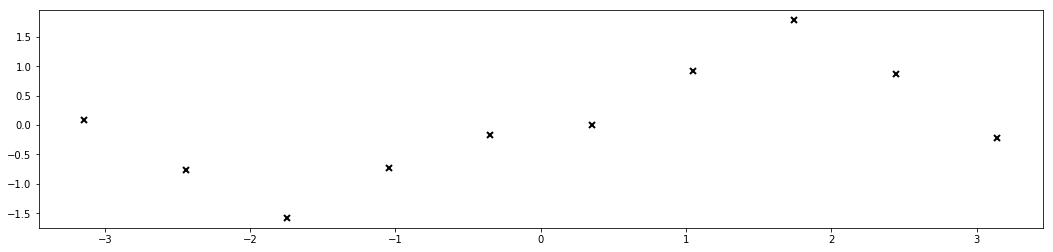

In [147]:
# lambda function, call f(x) to generate data
#f = lambda x: -np.cos(2*np.pi*x) + 0.5*np.sin(6*np.pi*x)
f = lambda x: x * np.sin(x) ** 2
N = 10
# N equally spaced sample locations 
X = np.linspace(-np.pi, np.pi, N)[:,None]

# y = f(X) + epsilon
y = f(X) + np.random.normal(0., 0.1, (N,1)) # note that np.random.normal takes mean and s.d. (not variance), 0.1^2 = 0.01

# Setup our figure environment
plt.figure(figsize=(18, 4))

# # Plot observations
plt.plot(X, y, "kx", mew=2);

# # Annotate plot
# plt.xlabel("x"), plt.ylabel("f")
# plt.legend(labels=["sample points"]);
################################################

### Training and Tests

In [168]:
#full gp
full_gp = create_full_gp(X,y)

Optimization terminated successfully.
         Current function value: 8.452370
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21


In [169]:
#distributed gp
%time dist_gp = DistributedGPRegression(X,y,2,True)

CPU times: user 11.7 ms, sys: 26.2 ms, total: 38 ms
Wall time: 146 ms


In [170]:
#train
%time dist_gp.train()
# %time dist_gp.train(pretrained=p)

CPU times: user 96.6 ms, sys: 155 ms, total: 251 ms
Wall time: 33.2 ms


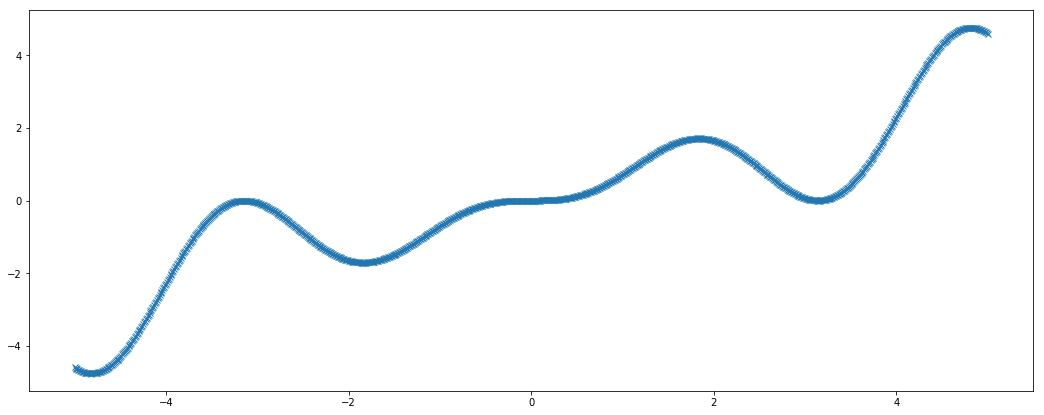

In [171]:
# New test points to sample function from
Ntest = 1000
Xtest = np.linspace(-5, 5, Ntest)[:, None]
plt.figure(figsize=(18,7))
plt.plot(Xtest, f(Xtest),'x');

In [172]:
#####PREDICTIONS
preds = []
full_mean, full_Cov = full_gp.predict(Xtest, False)
preds.append((full_mean, full_Cov, 'Full GP'))
mean_w2, Cov_w2 = dist_gp.gbarycenter(Xtest, ksi='opt')
preds.append((mean_w2, Cov_w2, 'Wasserstein Barycenter'))
mean_poe, Cov_poe = dist_gp.predict_gpoe(Xtest)
preds.append((mean_poe, Cov_poe, 'Product of Experts'))
mean_bcm, Cov_bcm = dist_gp.predict_bcm(Xtest)
preds.append((mean_bcm, Cov_bcm, 'Bayesian Committee Machine'))
mean_rbcm, Cov_rbcm = dist_gp.predict_rbcm(Xtest)
preds.append((mean_rbcm, Cov_rbcm,'Robust Bayesian Committee Machine'))

----------------Evaluations-----------------
Full GP : mse = 3.627822633288758, msll = 3.4456342693514825
-----------------------------------------------
Wasserstein Barycenter : mse = 3.718046543177225, msll = 3.419943235262389
-----------------------------------------------
Product of Experts : mse = 3.656132671278086, msll = 36.90105369054474
-----------------------------------------------
Bayesian Committee Machine : mse = 3.7218424234228107, msll = 34.57629659191376
-----------------------------------------------
Robust Bayesian Committee Machine : mse = 3.599554619208711, msll = 137.89668717084598
-----------------------------------------------


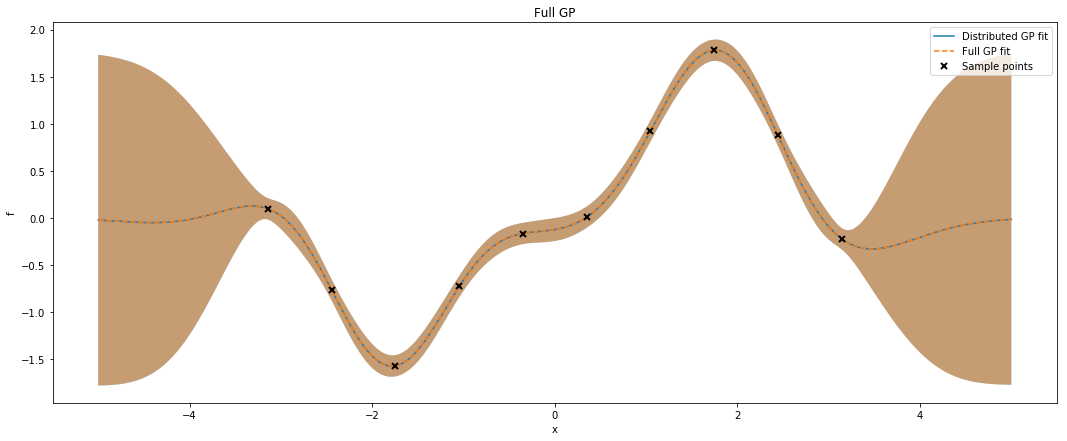

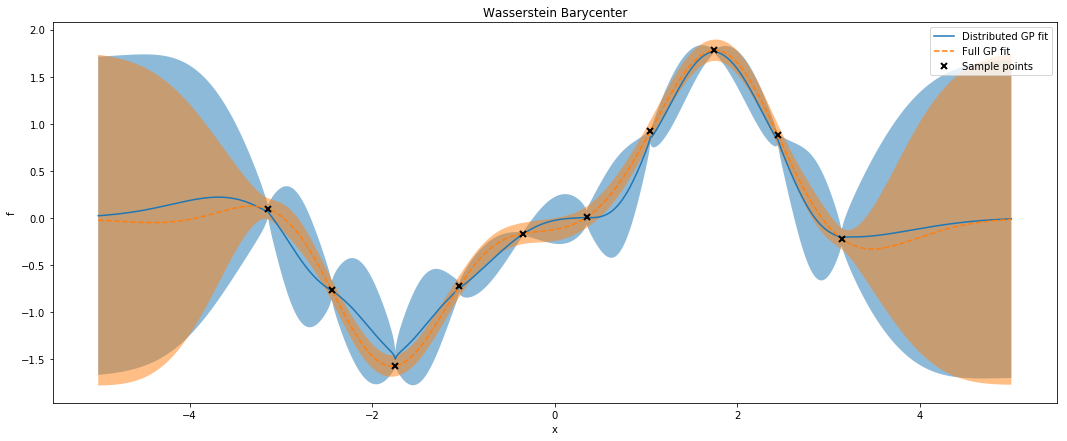

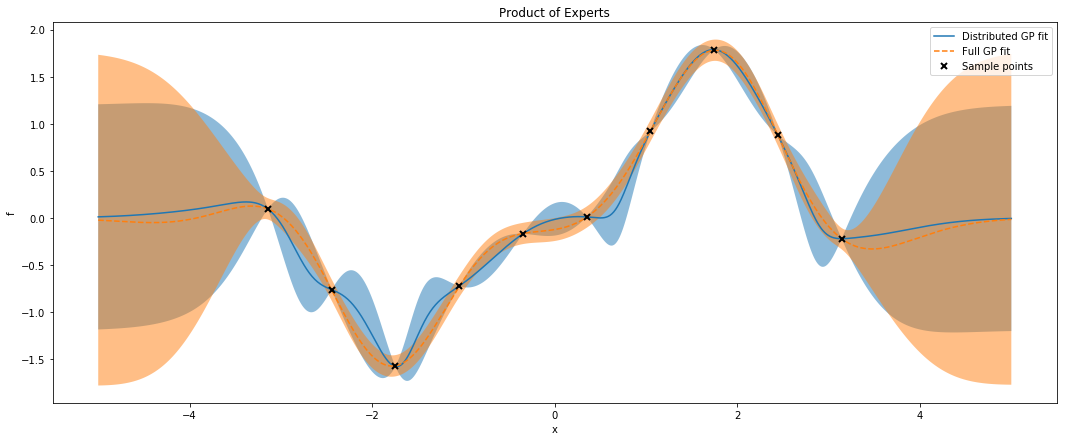

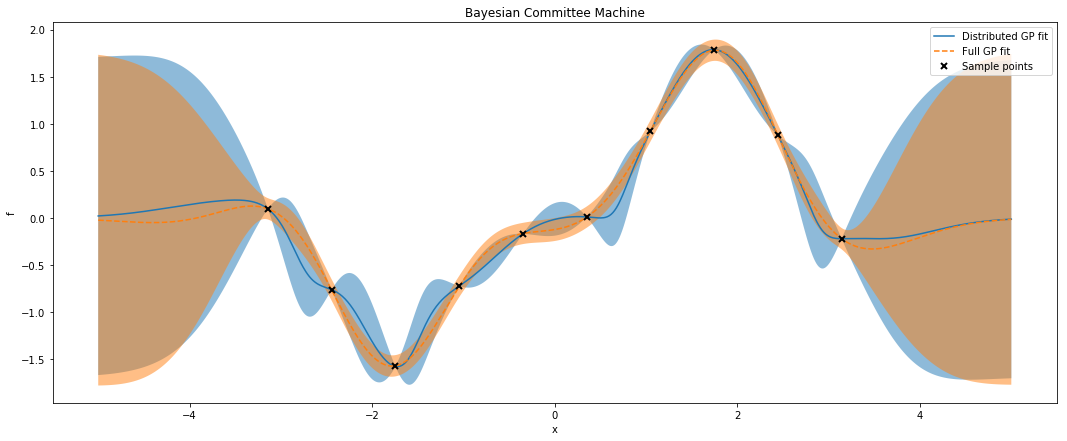

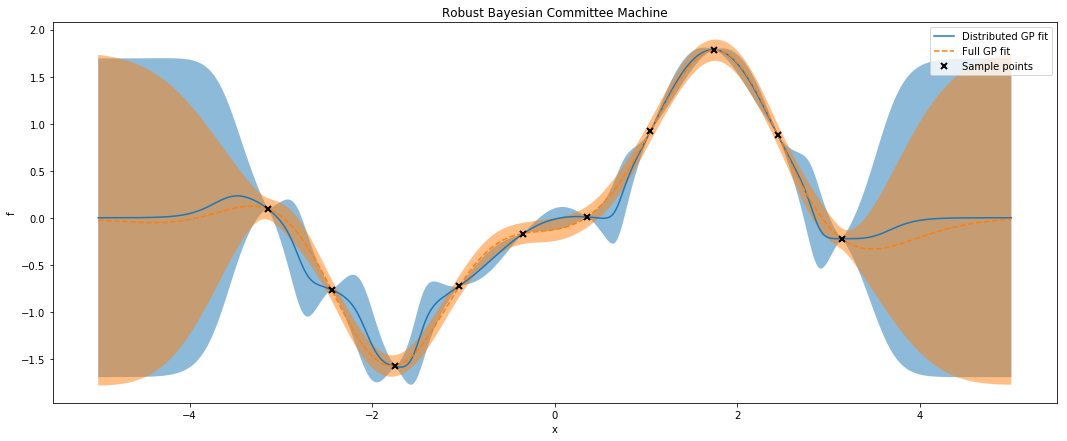

In [176]:
# Evaluations
print('----------------Evaluations-----------------')
ytest = f(Xtest)
for mean, Cov, name in preds:
    mse = dist_gp.mse(ytest, mean)
    msll = dist_gp.msll(ytest, mean, Cov)
    print('{} : mse = {}, msll = {}'.format(name, mse, msll))
    print('-----------------------------------------------')
# plots
for mean, Cov, name in preds:
    plt.figure(figsize=(18, 7))
    plt.title(name)
    plot_gp(Xtest, mean[:,None], np.diag(Cov), full_mean[:,None],
            np.diag(full_Cov), sample_points=(X, y), full=True)
    plt.savefig(name+'.png')

In [174]:
# %time preds = dist_gp.experts_preds(Xtest, mp.Pool(mp.cpu_count()))
# for i, mean, Cov in preds:
#     print(i)
#     plt.figure(figsize=(18,7))
#     plot_dgp(Xtest, mean.reshape(-1, 1), Cov, mean.reshape(-1, 1), Cov, sample_points=(Xtest,ytest), full=False)

In [175]:
# for j, mean, Cov in preds:
#     #     dist_gp.Experts[j].k.setParams(po)
#     vec = dist_gp.ksi[j][497:503]
#     fvar = np.diag(Cov)[497:503]
#     print('{}\n{}\n'.format(vec,fvar))
# print(dist_gp.ksi)

## 2D

### Data 2D

In [ ]:
# Lambda function, f, the unknown function we are trying to predict
f = lambda X: np.sin(X[:,0]) * np.sin(X[:,1])

# Number of training samples 
num_measurements = 50

# Random sample locations (2-D)
X2 = np.random.uniform(-np.pi, np.pi, (num_measurements, 2))
y2 = f(X2).reshape(-1,1) + np.random.normal(0., 0.1, (len(X2),1)) 

In [ ]:
# Our test grid
Xtest_grid = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 20))
Xtest = np.vstack([Xtest_grid[0].ravel(),Xtest_grid[1].ravel()]).T
ytest = f(Xtest).reshape(-1,1) + np.random.normal(0., 0.1, (len(Xtest),1)) 
gp_plot2D(Xtest_grid,X2,f(Xtest))

### Training and Tests

In [ ]:
# params = np.array([0, np.log(0.1 + 0.01), 0])
# params = np.random.randn(3,)
# kr = RadialBasisFunction(params)
# fgp = GaussianProcessRegression(X2,y2,kr)

In [ ]:
# fgp.optimize(params, True)

In [ ]:
##full gp
# full_gp = create_full_gp(X2,y2)
# full_mean, full_Cov = full_gp.predict(Xtest)

In [ ]:
#distributed gp
dist_gp = DistributedGPRegression(X2,y2,10 ,True)
#train
%time dist_gp.train()

In [ ]:
#####PREDICTIONS
preds = []
# preds.append((full_mean, full_Cov, 'Full GP'))
mean_w2, Cov_w2 = dist_gp.gbarycenter(Xtest, ksi='opt')
preds.append((mean_w2, Cov_w2, 'Wasserstein Barycenter'))
mean_poe, Cov_poe = dist_gp.predict_gpoe(Xtest)
preds.append((mean_poe, Cov_poe, 'Product of Experts'))
mean_bcm, Cov_bcm = dist_gp.predict_bcm(Xtest)
preds.append((mean_bcm, Cov_bcm, 'Bayesian Committee Machine'))
mean_rbcm, Cov_rbcm = dist_gp.predict_rbcm(Xtest)
preds.append((mean_rbcm, Cov_rbcm,'Robust Bayesian Committee Machine'))

In [ ]:
###Evaluations
print('----------------Evaluations-----------------')
ytest = f(Xtest)
for mean, Cov, name in preds:
    mse = dist_gp.mse(ytest , mean)
    msll = dist_gp.msll(ytest, mean, Cov)
    print('{} : mse = {}, msll = {}'.format(name, mse, msll))
    print('-----------------------------------------------')
###plots
for mean, Cov, name in preds:
    plt.figure(figsize=(18,7))
#     plt.title(name)
    gp_plot2D(Xtest_grid,np.random.randn(2,2),mean, np.diag(Cov));
    plt.savefig(name+'2D.png');

## Airlines Delay data

In [ ]:
import pandas as pd
root =  '/home/jonas/Documents/averagingmodels/latest_gptrain.ipynb/'
data = pd.read_csv(root+'airlinedelaycauses/DelayedFlights.csv')
data = data.iloc[:,1:]
data =  data.dropna()
#converting non-numerical values to categorical numerical values
for col in data.select_dtypes('object').columns: 
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes

In [ ]:
print(data.shape)
data.head()

In [ ]:
#Retained variables
vars = ['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'CRSArrTime', 'UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'Distance']
vars_plusy = ['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'CRSArrTime', 'UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'Distance','ArrDelay']
print(*vars)

In [ ]:
df = data[vars_plusy].sample(n=800000)
dfX = df[vars].values
dfy = df['ArrDelay'].values.reshape(-1,1)
dfX.shape, dfy.shape

In [ ]:
from sklearn.model_selection import train_test_split
dXtrain, dXtest, dytrain, dytest = train_test_split(dfX, dfy, test_size=0.125)
dXtrain.shape

In [ ]:
# !pip3 install pandas-profiling
# import pandas_profiling
# df = data.iloc[:10]
# report = df.profile_report()
# report.to_file(output_file='report.html')

### dgp

In [ ]:
%time dgptest = DistributedGPRegression(dXtrain, dytrain, 7000, True)

In [ ]:
%time dgptest.train()

In [ ]:
x = dXtest[0]

In [ ]:
meanDelay, CovDelay  = dgptest.gbarycenter(dXtest[:100],ksi='opt')

In [ ]:
###prediction
def batch_predict(Xt, batch_size=1000):
    q ,r = len(Xt)//batch_size, len(Xt)%batch_size
    N = batch_size
    mean = Cov = np.array([])
    for j in range(q):
        start = j*batch_size
        end = (j+1)*batch_size
        m, C = dgptest.gbarycenter(Xt[start:end],ksi='opt')
        mean = np.concatenate((mean, m))
        Cov = np.concatenate((Cov, C))
    #
    if r != 0:
        m, C = dgptest.gbarycenter(dXtest[q*batch_size:],ksi='opt')
        mean = np.concatenate((mean, m))
        Cov = np.concatenate((Cov, C))
    return mean, Cov
batch_size = 10
%time meanDelay, CovDelay = batch_predict(dXtest[:10], batch_size)

In [ ]:
dgptest.mse(dytest[:10], meanDelay), dgptest.msll(dytest[:10], meanDelay, CovDelay)

In [ ]:
dgptest.mse(dytest, meanDelay), dgptest.msll(dytest, meanDelay, CovDelay)

In [ ]:
# full_gptest = create_full_gp(dXtest,dytest)

In [ ]:
# fm, fC = full_gptest.predict(dXtest)
# full_gptest.mse(dytest, fm), full_gptest.msll(dytest, fm, fC)